In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv("country_covid19.csv")
covid.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
covid.shape

(6603, 9)

In [4]:
covid.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
Date                   6603 non-null object
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [6]:
covid.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

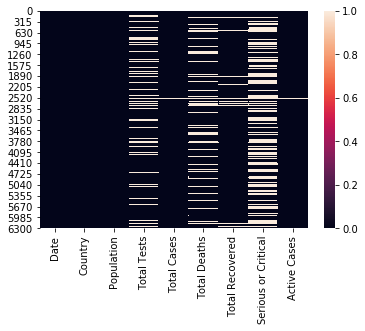

In [7]:
sns.heatmap(covid.isna())

In [8]:
covid=covid.fillna(covid.mean())

In [9]:
covid.isna().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [10]:
covid['Date'] = pd.to_datetime(covid.Date)

In [11]:
covid['year'] = covid['Date'].dt.year 
covid['month'] = covid['Date'].dt.month 
covid['day'] = covid['Date'].dt.day 

In [12]:
covid.drop(['Date','year'],axis=1,inplace=True)

In [13]:
covid.head(10)

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,month,day
0,USA,330774664,3722145.0,738792.0,39014.0,68269.000000,13551.0,631509.0,4,18
1,Russia,145927292,1831892.0,36793.0,313.0,3057.000000,8.0,33423.0,4,18
2,Spain,46752703,930230.0,194416.0,20043.0,74797.000000,7371.0,99576.0,4,18
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.000000,6634.0,20335.0,4,18
4,UK,67844241,460437.0,114217.0,15464.0,5855.424185,1559.0,98409.0,4,18
5,Italy,60471924,1305833.0,175925.0,23227.0,44927.000000,2733.0,107771.0,4,18
6,France,65256826,463662.0,151793.0,19323.0,35983.000000,5833.0,96487.0,4,18
7,Germany,83752855,1728357.0,143724.0,4538.0,85400.000000,2922.0,53786.0,4,18
8,Turkey,84230075,598933.0,82329.0,1890.0,10453.000000,1894.0,69986.0,4,18
9,Iran,83862642,330137.0,80868.0,5031.0,55987.000000,3513.0,19850.0,4,18


In [14]:
covid.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,month,day
Population,1.000000e+00,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359,-4.746909e-18,6.038413e-18
Total Tests,2.237353e-01,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809,6.394901e-02,-3.165231e-02
Total Cases,2.258444e-01,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361,3.363032e-02,-1.680237e-02
Total Deaths,1.767733e-01,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732,2.746937e-02,-1.261157e-02
Total Recovered,3.093609e-01,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265,6.416855e-02,-3.157308e-02
Serious or Critical,1.704606e-01,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204,-1.379096e-02,1.022173e-02
Active Cases,1.793593e-01,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000,1.709871e-02,-1.024770e-02
month,-4.746909e-18,0.063949,0.033630,0.027469,0.064169,-0.013791,0.017099,1.000000e+00,-8.391926e-01
day,6.038413e-18,-0.031652,-0.016802,-0.012612,-0.031573,0.010222,-0.010248,-8.391926e-01,1.000000e+00


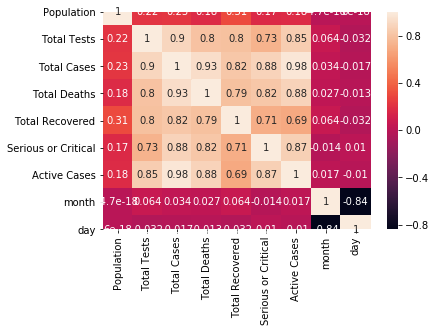

In [15]:
sns.heatmap(covid.corr(),annot=True)

In [16]:
world_data= covid.groupby("Country")['Total Tests','Total Cases','Active Cases','Total Recovered','Total Deaths'].sum().reset_index()
print(world_data.head(10))

               Country   Total Tests  Total Cases  Active Cases  \
0          Afghanistan  5.991072e+05      97988.0       83202.0   
1              Albania  2.737000e+05      24227.0        6983.0   
2              Algeria  1.983590e+05     142955.0       63102.0   
3              Andorra  5.809400e+04      23061.0        7488.0   
4               Angola  2.879550e+06       1079.0         700.0   
5             Anguilla  6.718480e+06         93.0          18.0   
6  Antigua and Barbuda  4.380000e+03        758.0         238.0   
7            Argentina  2.059171e+06     157280.0      103244.0   
8              Armenia  7.763600e+05      80213.0       45097.0   
9                Aruba  5.343400e+04       3101.0         604.0   

   Total Recovered  Total Deaths  
0          12268.0   2740.000000  
1          16353.0    915.000000  
2          65672.0  14356.000000  
3          14214.0   1359.000000  
4            316.0     63.000000  
5             75.0  42487.562884  
6            427.

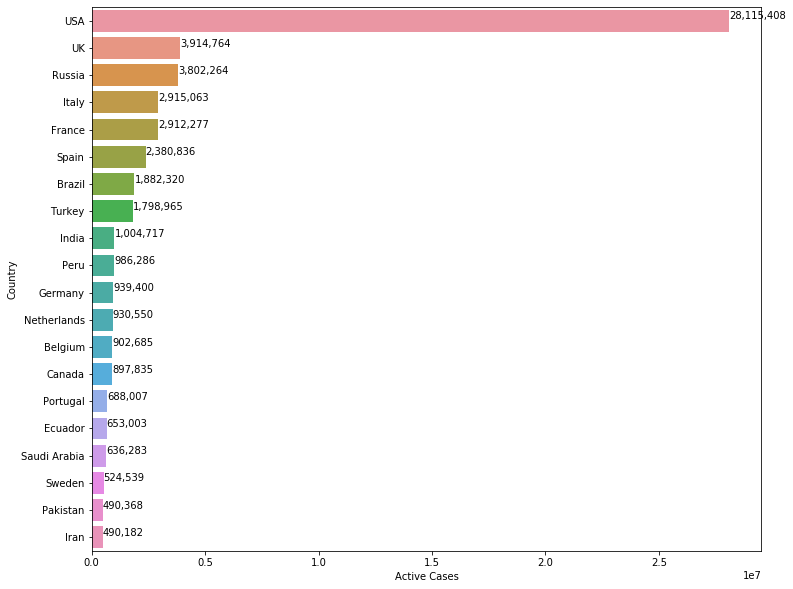

In [17]:
top_20 = world_data.sort_values(by=['Active Cases'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Active Cases'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Active Cases'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

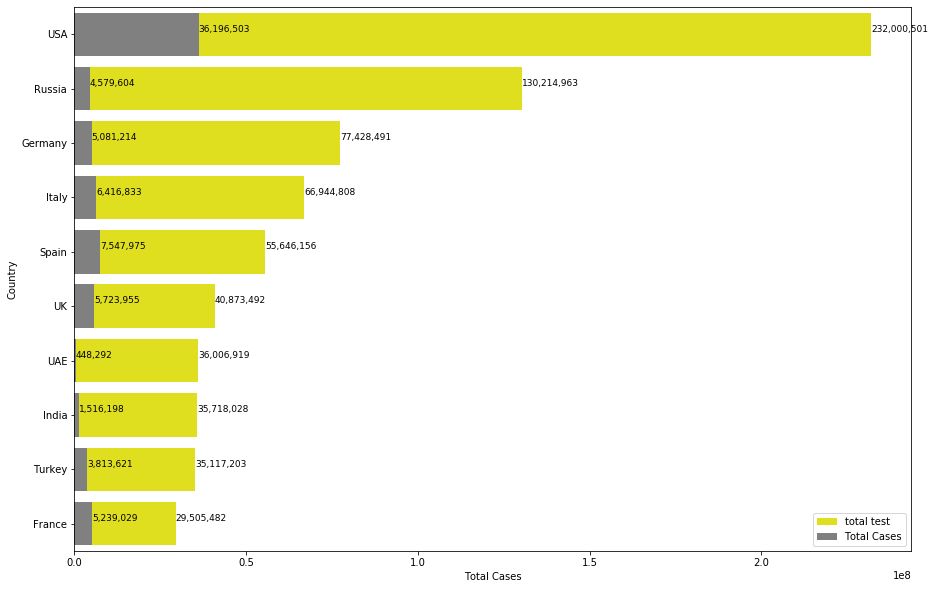

In [18]:
top_10 = world_data.sort_values(by=['Total Tests'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Tests = sns.barplot(top_10['Total Tests'], top_10['Country'], color = 'yellow', label='total test')
Total_Cases = sns.barplot(top_10['Total Cases'], top_10['Country'], color = 'grey', label='Total Cases')

for i,(value,name) in enumerate(zip(top_10['Total Tests'],top_10['Country'])):
    Total_Tests.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['Total Cases'],top_10['Country'])):
    Total_Cases.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

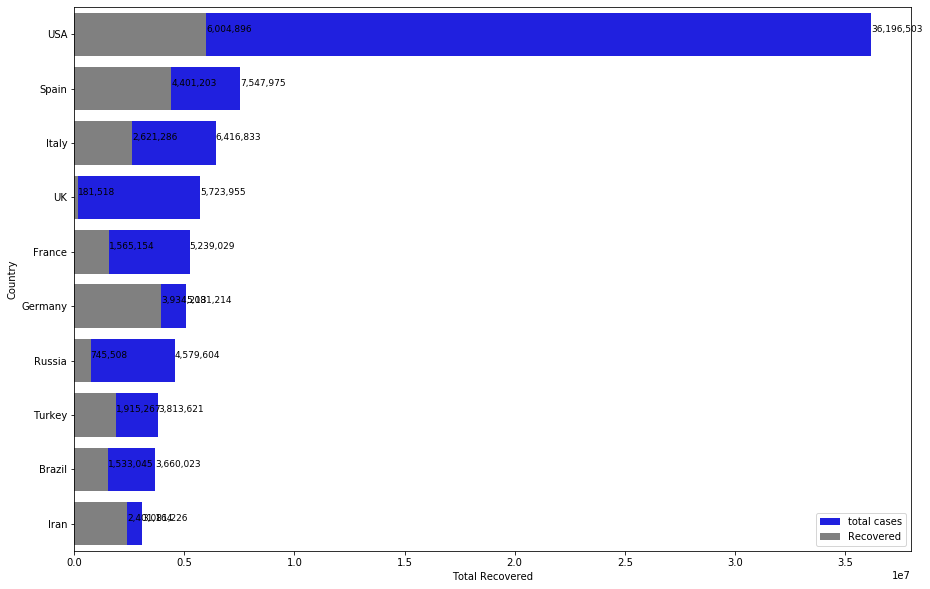

In [19]:
top_10 = world_data.sort_values(by=['Total Cases'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Cases = sns.barplot(top_10['Total Cases'], top_10['Country'], color = 'blue', label='total cases')
Total_Recovered = sns.barplot(top_10['Total Recovered'], top_10['Country'], color = 'grey', label='Recovered')

for i,(value,name) in enumerate(zip(top_10['Total Cases'],top_10['Country'])):
    Total_Cases.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['Total Recovered'],top_10['Country'])):
    Total_Recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

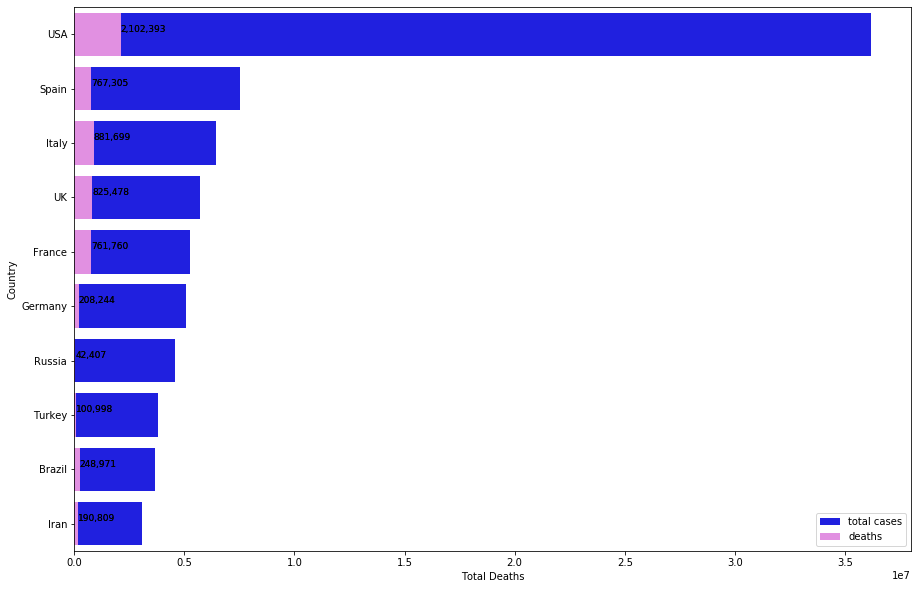

In [20]:
top_10= world_data.sort_values(by=['Total Cases'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Cases = sns.barplot(top_10['Total Cases'], top_10['Country'], color = 'blue', label='total cases')
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = 'violet', label='deaths')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Cases.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

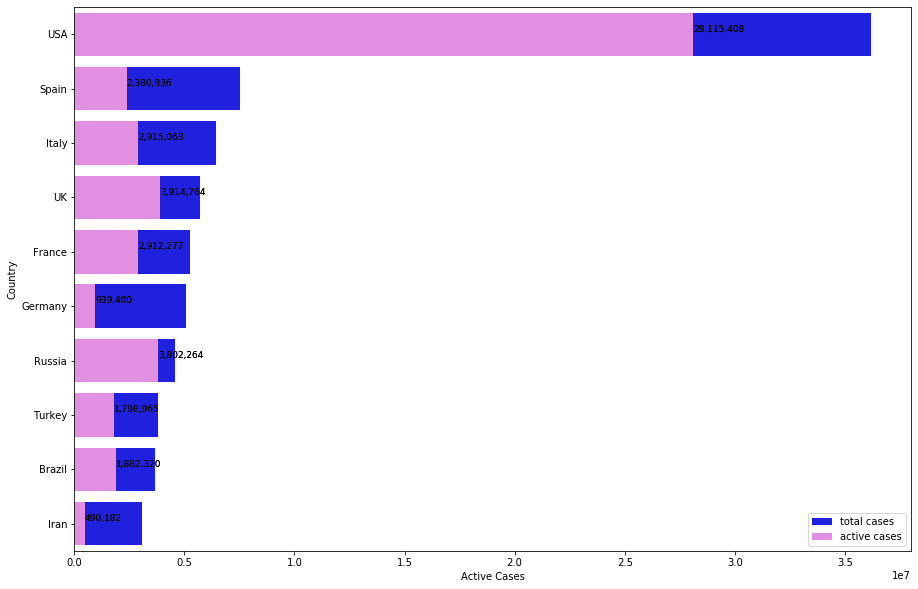

In [21]:
top_10 = world_data.sort_values(by=['Total Cases'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Cases= sns.barplot(top_10['Total Cases'], top_10['Country'], color = 'blue', label='total cases')
Active_Cases = sns.barplot(top_10['Active Cases'], top_10['Country'], color = 'violet', label='active cases')

for i,(value,name) in enumerate(zip(top_10['Active Cases'],top_10['Country'])):
     Total_Cases.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['Active Cases'],top_10['Country'])):
     Active_Cases.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

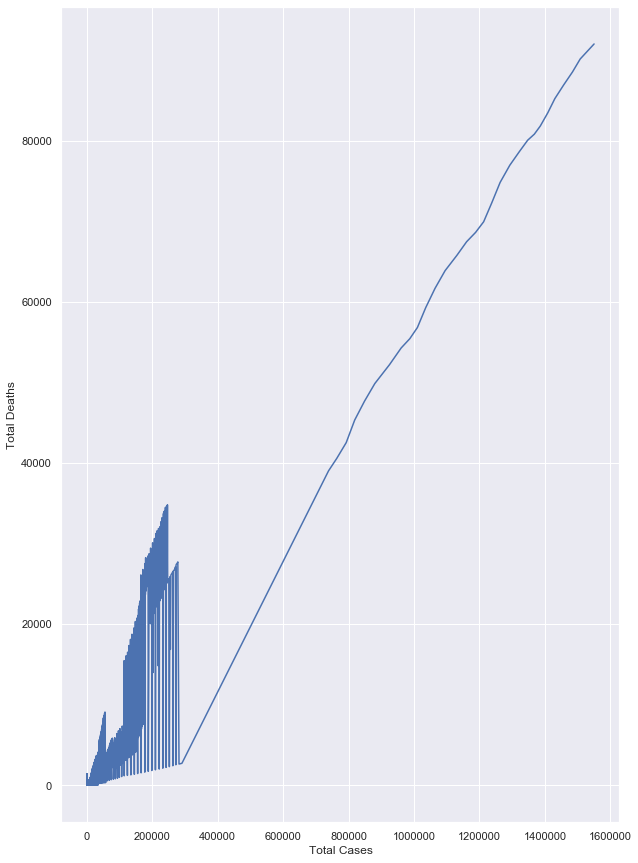

In [22]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="Total Cases",y="Total Deaths",data=covid)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

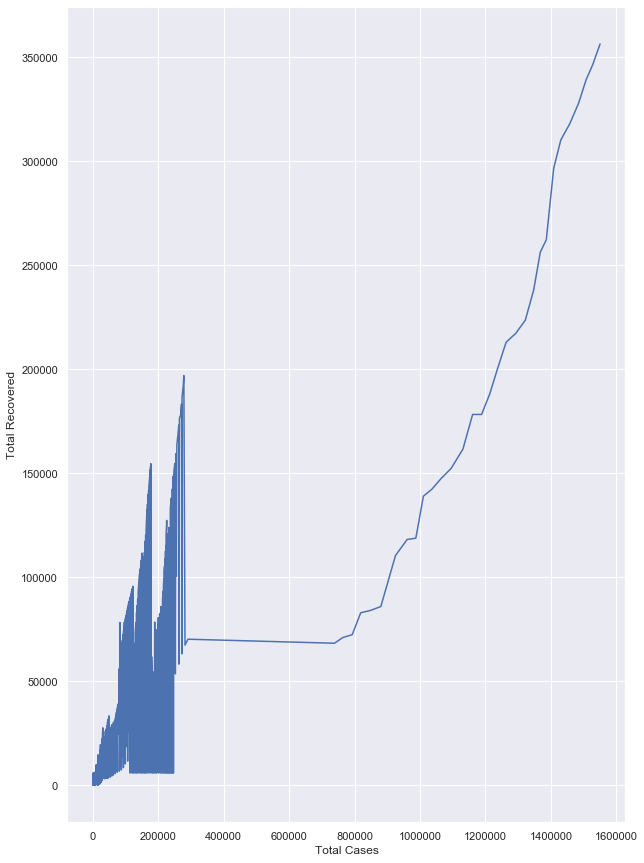

In [23]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="Total Cases",y="Total Recovered",data=covid)
plt.show

# COVID-19 death rate is very much age dependent.Using auxiliary table which have information about deaths at different age groups for different country. 

In [24]:
age=pd.read_csv('age_per_country.csv')
age.head()

,Country,0-14 years,15-64 years,65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [25]:
age.shape

(213, 4)

In [26]:
age_data= age.groupby("Country")['0-14 years','15-64 years','65+ years'].sum().reset_index()
print(age_data.head(10))

               Country  0-14 years  15-64 years  65+ years
0          Afghanistan       0.432        0.542      0.026
1              Albania       0.174        0.689      0.132
2              Algeria       0.293        0.645      0.062
3              Andorra       0.000        0.000      0.000
4               Angola       0.468        0.508      0.024
5             Anguilla       0.000        0.000      0.000
6  Antigua and Barbuda       0.239        0.692      0.069
7            Argentina       0.249        0.639      0.112
8              Armenia       0.200        0.688      0.112
9                Aruba       0.000        0.000      0.000


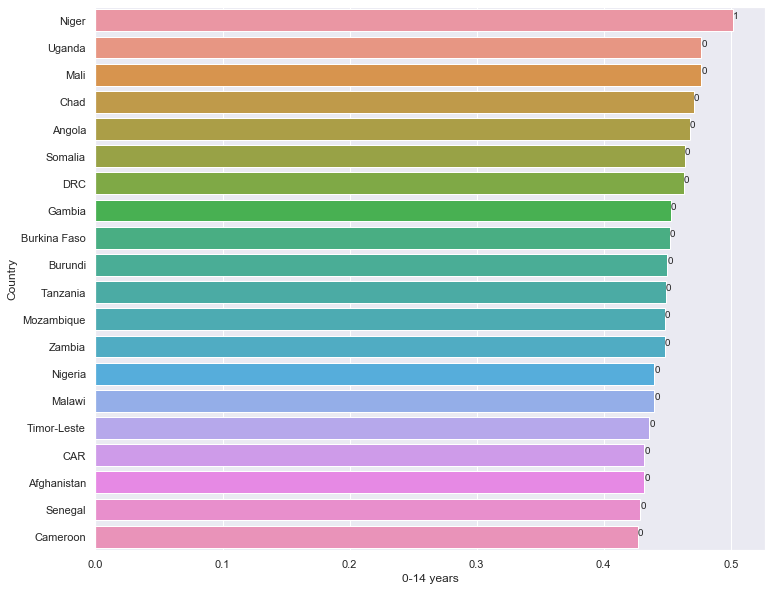

In [27]:
top_20 = age_data.sort_values(by=['0-14 years'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['0-14 years'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['0-14 years'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

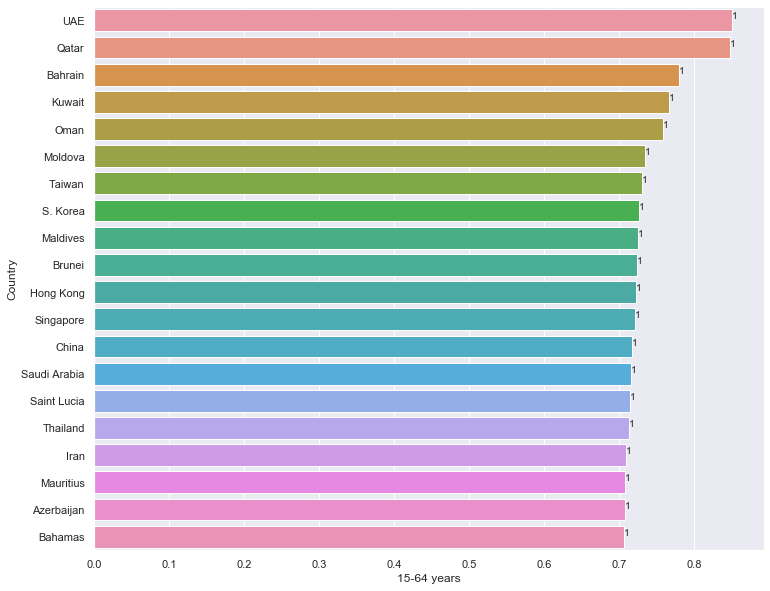

In [28]:
top_20 = age_data.sort_values(by=['15-64 years'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['15-64 years'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['15-64 years'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

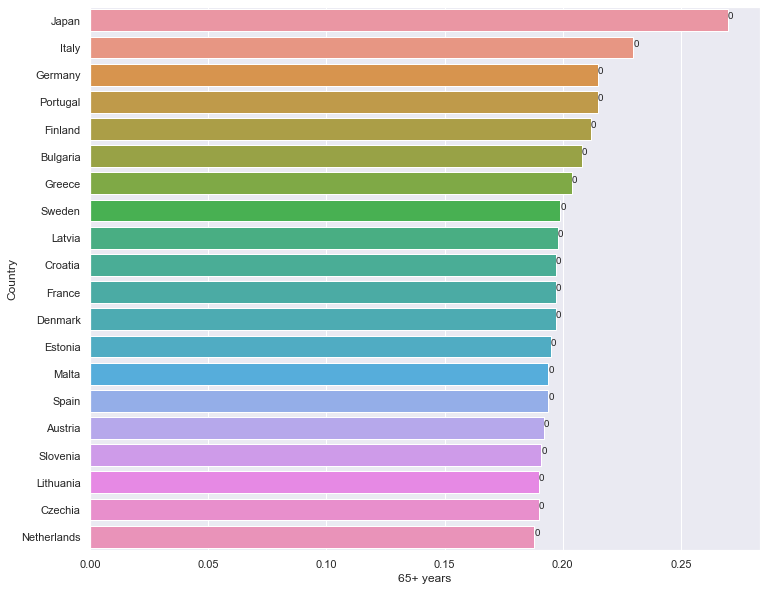

In [29]:
top_20 = age_data.sort_values(by=['65+ years'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['65+ years'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['65+ years'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [30]:
df=pd.merge(world_data,age_data)

In [31]:
df.head()

,Country,Total Tests,Total Cases,Active Cases,Total Recovered,Total Deaths,0-14 years,15-64 years,65+ years
0,Afghanistan,5.991072e+05,97988.0,83202.0,12268.0,2740.0,0.432,0.542,0.026
1,Albania,2.737000e+05,24227.0,6983.0,16353.0,915.0,0.174,0.689,0.132
2,Algeria,1.983590e+05,142955.0,63102.0,65672.0,14356.0,0.293,0.645,0.062
3,Andorra,5.809400e+04,23061.0,7488.0,14214.0,1359.0,0.000,0.000,0.000
4,Angola,2.879550e+06,1079.0,700.0,316.0,63.0,0.468,0.508,0.024


In [32]:
df_data= df.groupby("Country")['Total Tests','Total Cases','Active Cases','Total Recovered','Total Deaths','0-14 years','15-64 years','65+ years'].sum().reset_index()
df_data.head(10)

,Country,Total Tests,Total Cases,Active Cases,Total Recovered,Total Deaths,0-14 years,15-64 years,65+ years
0,Afghanistan,5.991072e+05,97988.0,83202.0,12268.0,2740.000000,0.432,0.542,0.026
1,Albania,2.737000e+05,24227.0,6983.0,16353.0,915.000000,0.174,0.689,0.132
2,Algeria,1.983590e+05,142955.0,63102.0,65672.0,14356.000000,0.293,0.645,0.062
3,Andorra,5.809400e+04,23061.0,7488.0,14214.0,1359.000000,0.000,0.000,0.000
4,Angola,2.879550e+06,1079.0,700.0,316.0,63.000000,0.468,0.508,0.024
5,Anguilla,6.718480e+06,93.0,18.0,75.0,42487.562884,0.000,0.000,0.000
6,Antigua and Barbuda,4.380000e+03,758.0,238.0,427.0,93.000000,0.239,0.692,0.069
7,Argentina,2.059171e+06,157280.0,103244.0,46383.0,7746.000000,0.249,0.639,0.112
8,Armenia,7.763600e+05,80213.0,45097.0,34077.0,1150.000000,0.200,0.688,0.112
9,Aruba,5.343400e+04,3101.0,604.0,2423.0,74.000000,0.000,0.000,0.000


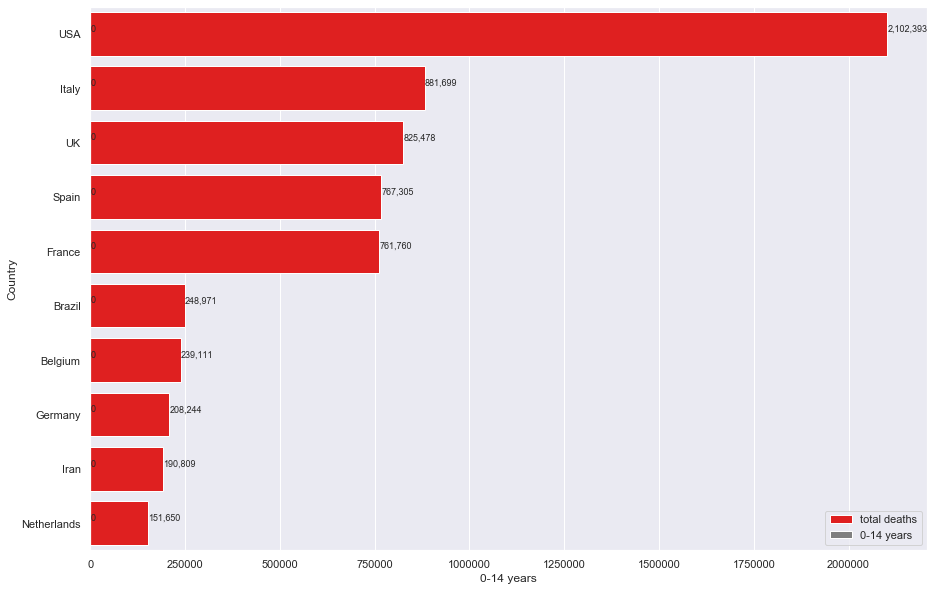

--------------------------------------------------------------------------------------------------------------------


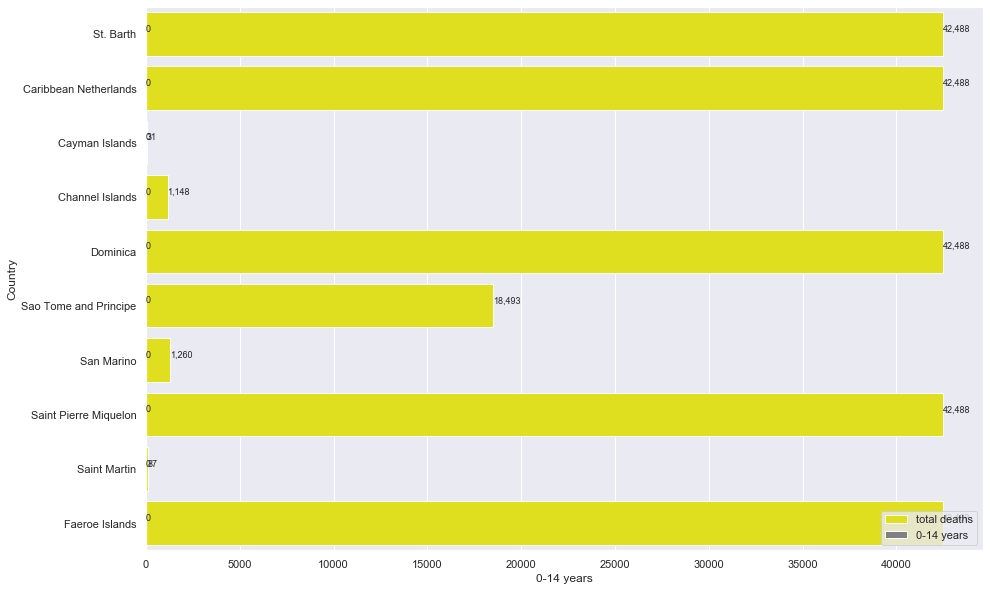

In [33]:
top_10 = df_data.sort_values(by=['Total Deaths'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = 'red', label='total deaths')
age1= sns.barplot(top_10['0-14 years'], top_10['Country'], color = 'grey', label='0-14 years')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['0-14 years'],top_10['Country'])):
    age1.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

print("--------------------------------------------------------------------------------------------------------------------")


top_10 = df_data.sort_values(by=['0-14 years']).head(10)

plt.figure(figsize=(15,10))
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = "yellow", label='total deaths')
age1= sns.barplot(top_10['0-14 years'], top_10['Country'], color = 'grey', label='0-14 years')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['0-14 years'],top_10['Country'])):
    age1.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

Above graph show the country which have max deaths rate of age range between 0-14 years.

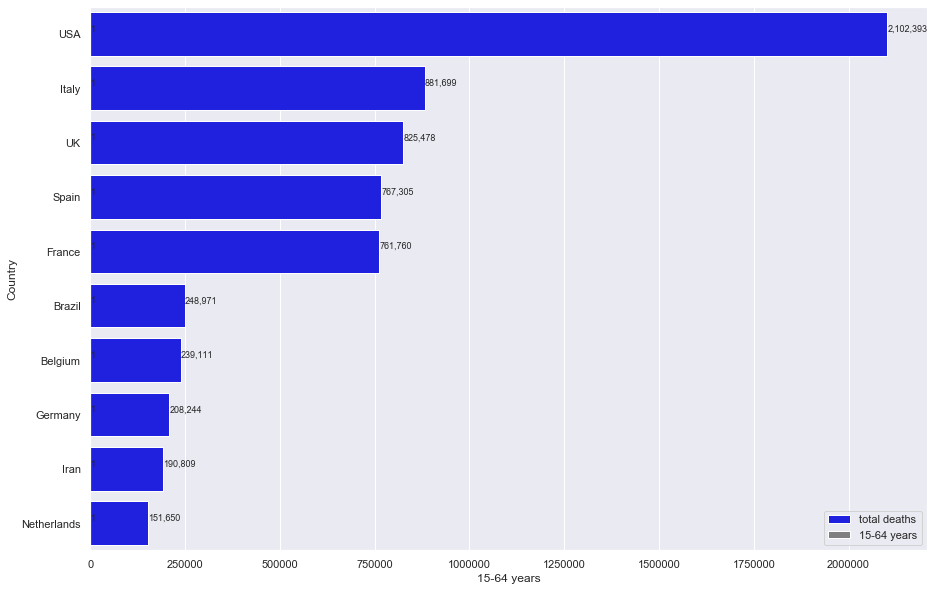

--------------------------------------------------------------------------------------------------------------------


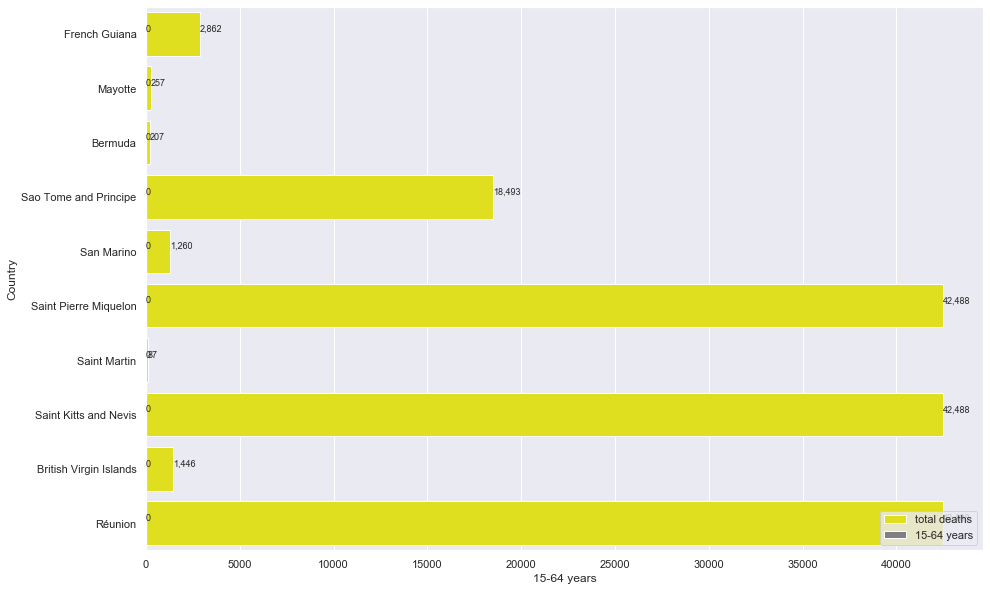

In [34]:
top_10 = df_data.sort_values(by=['Total Deaths'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = 'blue', label='total deaths')
age2= sns.barplot(top_10['15-64 years'], top_10['Country'], color = 'grey', label='15-64 years')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['15-64 years'],top_10['Country'])):
    age2.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------")


top_10 = df_data.sort_values(by=['15-64 years']).head(10)

plt.figure(figsize=(15,10))
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = 'yellow', label='total deaths')
age2= sns.barplot(top_10['15-64 years'], top_10['Country'], color = 'grey', label='15-64 years')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['15-64 years'],top_10['Country'])):
    age2.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

Above graph show the country which have max deaths rate of age range between 15-64 years.

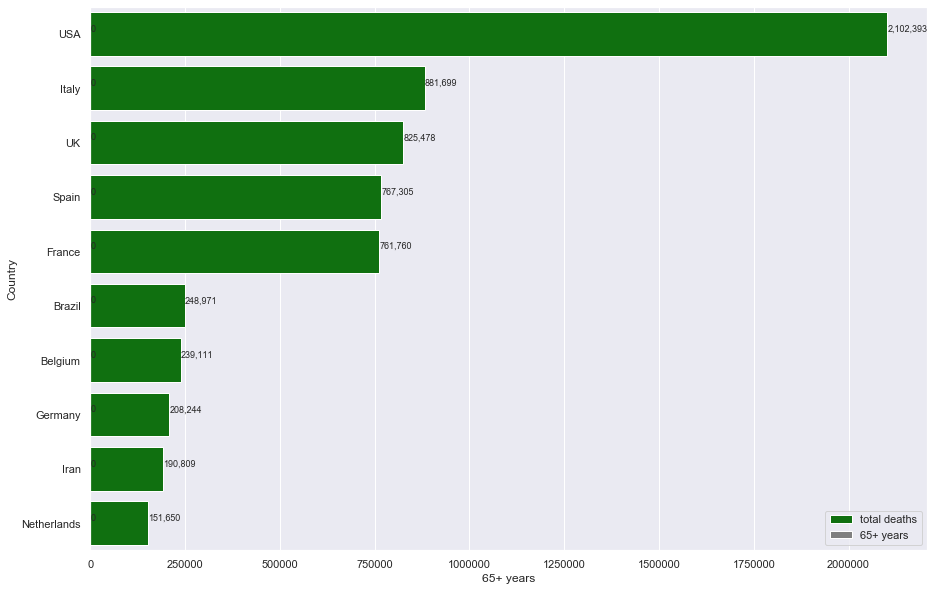

--------------------------------------------------------------------------------------------------------------------


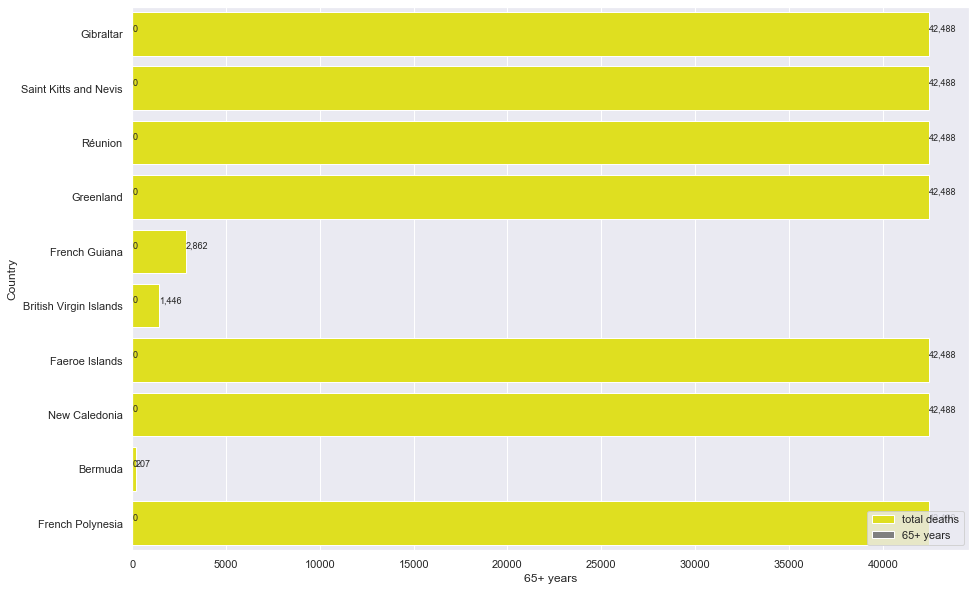

In [35]:
top_10 = df_data.sort_values(by=['Total Deaths'], ascending=False).head(10)

plt.figure(figsize=(15,10))
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = 'green', label='total deaths')
age3= sns.barplot(top_10['65+ years'], top_10['Country'], color = 'grey', label='65+ years')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['65+ years'],top_10['Country'])):
    age3.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

print("--------------------------------------------------------------------------------------------------------------------")



top_10 = df_data.sort_values(by=['65+ years']).head(10)

plt.figure(figsize=(15,10))
Total_Deaths = sns.barplot(top_10['Total Deaths'], top_10['Country'], color = 'yellow', label='total deaths')
age3= sns.barplot(top_10['65+ years'], top_10['Country'], color = 'grey', label='65+ years')

for i,(value,name) in enumerate(zip(top_10['Total Deaths'],top_10['Country'])):
    Total_Deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['65+ years'],top_10['Country'])):
    age3.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

Above graph show the country which have max deaths rate of age range between 65+ years

In [36]:
covid.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,month,day
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03,6603.000000,6603.000000
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03,4.580645,15.580645
std,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04,0.493491,8.526788
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,4.000000,1.000000
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01,4.000000,8.000000
50%,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02,5.000000,16.000000
75%,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03,5.000000,23.000000
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,5.000000,30.000000


In [37]:
from sklearn import preprocessing 

lab = preprocessing.LabelEncoder() 
covid['Country']= lab.fit_transform(covid['Country']) 
covid['Country'].head() 

0    201
1    158
2    180
3     26
4    200
Name: Country, dtype: int32

In [38]:
covid["Population"]=(covid["Population"]-covid["Population"].min())/(covid["Population"].max()-covid["Population"].min())
covid["Total Tests"]=(covid["Total Tests"]-covid["Total Tests"].min())/(covid["Total Tests"].max()-covid["Total Tests"].min())
covid["Total Cases"]=(covid["Total Cases"]-covid["Total Cases"].min())/(covid["Total Cases"].max()-covid["Total Cases"].min())
covid["Total Deaths"]=(covid["Total Deaths"]-covid["Total Deaths"].min())/(covid["Total Deaths"].max()-covid["Total Deaths"].min())
covid["Total Recovered"]=(covid["Total Recovered"]-covid["Total Recovered"].min())/(covid["Total Recovered"].max()-covid["Total Recovered"].min())
covid["Serious or Critical"]=(covid["Serious or Critical"]-covid["Serious or Critical"].min())/(covid["Serious or Critical"].max()-covid["Serious or Critical"].min())
covid["Active Cases"]=(covid["Active Cases"]-covid["Active Cases"].min())/(covid["Active Cases"].max()-covid["Active Cases"].min())
covid["Country"]=(covid["Country"]-covid["Country"].min())/(covid["Country"].max()-covid["Country"].min())

In [39]:
covid.skew()

Country                2.265373e-15
Population             8.743503e+00
Total Tests            9.340104e+00
Total Cases            1.207998e+01
Total Deaths           8.951957e+00
Total Recovered        7.220713e+00
Serious or Critical    9.199670e+00
Active Cases           1.330152e+01
month                 -3.269345e-01
day                   -2.756963e-02
dtype: float64

In [40]:
from scipy.stats import zscore

z_score=abs(zscore(covid))
print(covid.shape)
covid_final=covid.loc[(z_score<3).all(axis=1)]
print(covid_final.shape)

(6603, 10)
(6272, 10)


In [41]:
X= covid_final.drop(['Total Deaths'], axis = 1)
print(X.shape)

(6272, 9)


In [42]:
y =covid_final['Total Deaths'] 
print(y.shape)

(6272,)


In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [45]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [46]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [47]:
model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.5351760452774291
MSE:  7.410003648155626e-05
Cross Validation:  0.4539468003804085


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.00042487235297450354
MSE:  0.0001594830016509302
Cross Validation:  -0.0037791195131721576


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.00042487235297450354
MSE:  0.0001594830016509302
Cross Validation:  -0.0037791195131721576


------------------- Ridge(alpha=1.0, copy_X=True, 

I Choose Random Forest Regressor as my final model because it perform very well on our dataset.Its give best r2 score

R2_score:  0.9774095256290067

MSE:  3.6012665827976957e-06

Cross Validation:  0.9396707190734009

In [49]:
from sklearn.externals import joblib

joblib.dump(rf,'covid_final_joblib')

['covid_final_joblib']